### Import and cleansing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import pickle

In [ ]:
df = pd.read_csv("train_preprocess.tsv.txt", encoding="latin1", sep='\t', header=None, names=["text", "label"])
df

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11000 non-null  object
 1   label   11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
df.duplicated().sum()

67

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.shape

(10933, 2)

In [ ]:
df.label.value_counts()

positive    6383
negative    3412
neutral     1138
Name: label, dtype: int64

## Text Processing

In [ ]:
df_alay = pd.read_csv('new_kamusalay.csv', encoding='ISO-8859-1', header=None)
df_alay = df_alay.rename(columns={0: 'alay', 1: 'formal'})
df_alay_dict = dict(zip(df_alay['alay'], df_alay['formal']))

In [ ]:
def case_folding (text):
    return text.lower()

def clean (text):
    clean1 = re.sub ('\\n','', text)
    clean2 = re.sub ('RT',' ', clean1)
    clean3 = re.sub ('USER', ' ', clean2)
    clean4 = re.sub ('(http|https):\/\/s+', ' ', clean3)
    clean5 = re.sub ('[^0-9a-zA-Z]+', ' ', clean4)
    clean6 = re.sub ('x[a-z0-9]{2}', ' ', clean5)
    clean7 = re.sub ("\d+", ' ', clean6)
    clean8 = re.sub ('  +', '', clean7)
    clean9 = re.sub ('user', ' ', clean8)
    return clean9

def tokenization(text):
    text = re.split('\W+', text)
    return text

def alay_normalization(text):
    newlist = []
    for word in text:
        if word in df_alay_dict:
            text = df_alay_dict[word]
            newlist.append(text)
        else:
            text = word
            newlist.append(text)
    return newlist

#stopwords
stopword_list = ["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                 'yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia',
                  'ia', 'seperti', 'jika', 'sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh',
                  'saat', 'sementara', 'setelah', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah',
                  'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bahwa', 'atau', 'kita', 'dengan',
                  'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda',
                  'kalo', 'amp', 'biar', 'bikin', 'bilang', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya','kayak', 'i', 'a',
                  'gak', 'ga', 'krn', 'nya', 'nih', 'sih','jd', 'jgn', 'sdh', 'aja', 'n', 't', 'gue', 'yah',
                 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang',
                  'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun',
                  'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'seolah', 'seraya',
                  'seterusnya', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'mari', 'nanti', 'oh', 'ok',
                  'setiap', 'sesuatu','saja', 'toh', 'walau', 'amat', 'apalagi', 'dengan', 'bahwa', 'oleh']

stopword_list = set(stopword_list)

def remove_stopwords(text):
    text = [word for word in text if word not in stopword_list]
    return text

def clean_non_existed(text):
    if text == '':
        return None
    else:
        return text

#jadikan satu fungsi cleansing
def cleansing(text):
    text = case_folding(text)
    text = clean(text)
    text = tokenization(text)
    text = alay_normalization(text)
    text = remove_stopwords(text)
    text = ' '.join(text)
    text = clean_non_existed(text)
    return text

In [ ]:
df['text'] = df['text'].apply(cleansing)
df

<ipython-input-12-22ed196df721>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(cleansing)


,text,label
0,warung dimiliki pengusaha pabrik tahu puluhan ...,positive
1,mohon ulama lurus k mmbri hujjah pak ai apa ha...,neutral
2,lokasi strategis jalan sumatra bandung tempat ...,positive
3,betapa bahagia diri unboxing paket barang bagu...,positive
4,aduh jadi mahasiswa jangan sombong dong kasih ...,negative
...,...,...
10993,f demokrat dorong upaya kemandirian energi nas...,neutral
10994,tidak bosan,positive
10996,enak rasa masakan kepiting menyenangkan memili...,positive
10998,pagi pagi tol pasteur macet parah jengkel,negative


### Feature Extraction

#### TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_preprocessed = df.text.tolist()

In [ ]:
tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(data_preprocessed)

pickle.dump(tfidf_vect, open("vectorizer.pkl", "wb"))

tfidf_array = X.toarray()
df_array = pd.DataFrame(data=tfidf_array, columns = tfidf_vect.get_feature_names_out())

print(df_array)
print("Feature Extraction selesai")

       aakan  aan  aape  aas   ab  abad  abaikan  abak  abal  abalon  ...  \
0        0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   
1        0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   
2        0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   
3        0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   
4        0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   
...      ...  ...   ...  ...  ...   ...      ...   ...   ...     ...  ...   
10928    0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   
10929    0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   
10930    0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   
10931    0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   
10932    0.0  0.0   0.0  0.0  0.0   0.0      0.0   0.0   0.0     0.0  ...   

       zonpoliticon  zoo  zoom  zubir  zulfikri  zulkarnain  zup  zupa  zup

### Train Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# save output feature in variable classes
classes = df.label

# split dataset to 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8746, 15646)
(2187, 15646)
(8746,)
(2187,)


### Creating Neural Network Model

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', random_state=42)
model.fit(X_train, y_train)

print("Finished training model")

pickle.dump(model, open("model_NN.pkl", "wb"))

Finished training model


### Model Evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test = model.predict(X_test)

print(classification_report(y_test, test))

              precision    recall  f1-score   support

    negative       0.80      0.78      0.79       694
     neutral       0.78      0.71      0.74       227
    positive       0.88      0.91      0.90      1266

    accuracy                           0.85      2187
   macro avg       0.82      0.80      0.81      2187
weighted avg       0.85      0.85      0.85      2187



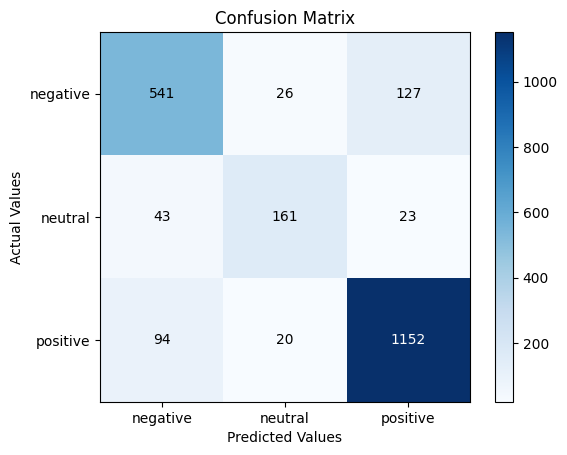

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, test, labels=["negative", "neutral", "positive"])
plt.imshow(cm, cmap=plt.cm.Blues)

# Tambahkan teks pada sel
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.xticks(np.arange(3), ["negative", "neutral", "positive"])
plt.yticks(np.arange(3), ["negative", "neutral", "positive"])
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from statistics import mean, stdev

In [ ]:
X = df[["text"]] # input feature
Y = df["label"] # output feature

# split dataset to 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# cross validation dengan split = 5
kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies=[]

X_train = X_train.reset_index().text
y_train = y_train.reset_index().label

In [ ]:
def cross_validation(k, X_train, model, name):
  accuracies = []
  precisions = []
  recalls = []
  f1_scores = []

  # iterate sebanyak k cross validation
  for iteration, data in enumerate(kf.split(X_train), start=1):
      # get data and target train
      data_train = X_train[data[0]]
      tfidf_vect = TfidfVectorizer()
      data_train = tfidf_vect.fit_transform(data_train)

      target_train = y_train[data[0]]

      # get data and target test
      data_test =  X_train[data[1]]
      data_test = tfidf_vect.transform(data_test)

      target_test =  y_train[data[1]]

      # model training menggunakan data train
      classifier = model
      classifier.fit(data_train, target_train)

      # prediksi data test
      preds = classifier.predict(data_test)

      # menghitung accuracy
      accuracy = accuracy_score(target_test, preds)
      precision = precision_score(target_test, preds, average='weighted')
      recall = recall_score(target_test, preds, average='weighted')
      f1 = f1_score(target_test, preds, average='weighted')

      # print("Training ke-", iteration)
      # print(classification_report(target_test, preds))
      # print("=================================================================")

      accuracies.append(accuracy)
      precisions.append(precision)
      recalls.append(recall)
      f1_scores.append(f1)

  result = {'algorithm': name,
                'accuracy_per_iter': accuracies, 'accuracy_mean': mean(accuracies), 'accuracy_std': stdev(accuracies),
                'recall_mean': mean(recalls),'precision_mean': mean(precisions), 'f1_mean': mean(f1_scores)}
  return result

In [ ]:
result = cross_validation(5, X_train, MLPClassifier(), "Neural Network")
result

{'algorithm': 'Neural Network',
 'accuracy_per_iter': [0.8474285714285714,
  0.8347627215551744,
  0.8393367638650657,
  0.8198970840480274,
  0.8296169239565466],
 'accuracy_mean': 0.8342084129706772,
 'accuracy_std': 0.010335324589167591,
 'recall_mean': 0.8342084129706772,
 'precision_mean': 0.8324097504082643,
 'f1_mean': 0.8326456088077915}

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def train_with_metrics(X_train, y_train, model, epochs=10, batch_size=32):

    # Plotting train accuracy and loss
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Assuming 'model' is your TensorFlow or Keras model
train_with_metrics(X_train, y_train, model, epochs=10, batch_size=32)


### Prediction Test

In [ ]:
original_text =  'SAYA SUKA MAKANAN ITU, ENAK SEKALI'

# Feature Extraction
text = tfidf_vect.transform([cleansing(original_text)])

# Sentiment prediction
result = model.predict(text)[0]
print("Sentiment:", result)

Sentiment: positive


In [ ]:
original_text =  'MEREKA bodoh bgt sih.'

# Feature Extraction
text = tfidf_vect.transform([cleansing(original_text)])

# Sentiment prediction
result = model.predict(text)[0]
print("Sentiment:", result)

Sentiment: negative


In [ ]:
original_text =  'saya sedang makan siang'

# Feature Extraction
text = tfidf_vect.transform([cleansing(original_text)])

# Sentiment prediction
result = model.predict(text)[0]
print("Sentiment:", result)

Sentiment: neutral


### Predict New Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import joblib

In [ ]:
# Memuat vectorizer dan model dari file
vectorizer = joblib.load('vectorizer.pkl')
model_nn = joblib.load('model_NN.pkl')

In [ ]:
df_predict = pd.read_csv("data.csv", encoding='latin-1')

In [ ]:
df_predict['cleaned_tweet'] = df_predict['Tweet'].apply(cleansing)
df_predict.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleaned_tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat memberi kamu edan sarap bergaul ci...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir aku tetap percaya tuhan pa...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku matamu sipit tapi dilihat mana aku
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal tam...


In [ ]:
# Assuming 'cleaned_tweet' is the column containing text data
df_predict['cleaned_tweet'].fillna('', inplace=True)

# Menggunakan vectorizer untuk mengubah teks menjadi vektor fitur
X = vectorizer.transform(df_predict['cleaned_tweet'])

# Melakukan prediksi sentimen dengan model neural network
predictions = model_nn.predict(X)

# Menambahkan kolom sentimen ke dalam DataFrame
df_predict['sentiment'] = predictions

In [ ]:
df_predict

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleaned_tweet,sentiment
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...,negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat memberi kamu edan sarap bergaul ci...,negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir aku tetap percaya tuhan pa...,positive
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku matamu sipit tapi dilihat mana aku,negative
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal tam...,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor kamu sekat...,negative
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk,negative
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu tidak bosan duh,negative
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah terdeteksi bom terkubur suatu l...,neutral


#### Categorical Distribution

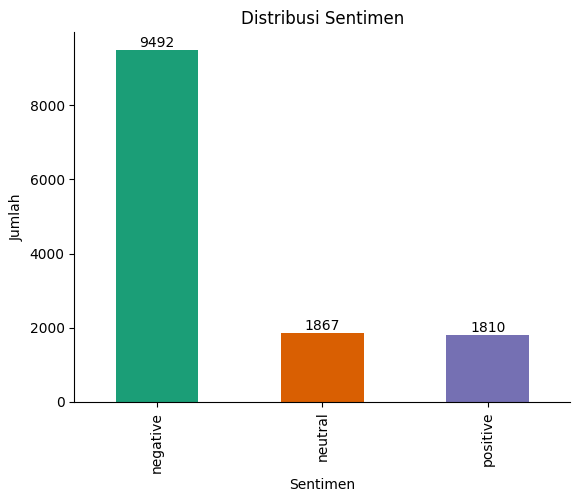

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Menghitung jumlah sentimen
sentiment_counts = df_predict['sentiment'].value_counts()

# Membuat plot diagram batang vertikal
fig, ax = plt.subplots()
sentiment_counts.plot(kind='bar', color=sns.color_palette('Dark2', n_colors=len(sentiment_counts)))

# Menambahkan nilai angka pada batang diagram
for index, value in enumerate(sentiment_counts):
    ax.text(index, value, str(value), ha='center', va='bottom')

# Menghilangkan garis-garis di atas dan di kanan plot
ax.spines[['top', 'right']].set_visible(False)

# Menyertakan label pada sumbu dan judul
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen')

# Menampilkan plot
plt.show()

### Store Results to DB

In [ ]:
# Menyimpan hasil prediksi ke dalam database SQLite
import sqlite3

conn = sqlite3.connect('sentiment_predictions.db')

# Sesuaikan dengan nama tabel yang sesuai dengan kebutuhan Anda.
df_predict.to_sql('sentiment_predictions', con=conn, index=False, if_exists='replace')

# Tutup koneksi setelah selesai
conn.close()